In [1]:
import numpy as np
import nibabel as nib
import os
import matplotlib.pyplot as plt
from math import pi
from utils.sim_functions import optimize_measurement
from utils.sim_functions import complete_measurement

# <span style="color:green"> Simple simulation T2* no TR no T1 </br>

In this inital notebook, the simulation uses the output from Tissue to MR converter with singular values for every label. </br>
_Echo time_ and _flip angle_ not selected for anything in particular. </br>
The aim of this notebook is to guide the user on how to use the simulation functions and the images required to run the simulator. </br>
The final outcome will be a **T2w image** as this code uses a short version of the signal equation that assumes the repetition time is long enough for the longitudinal magnetization to fully recover.

In [2]:
# Edit the echo time (or list of echo times) and the flip angle:
TE_list = [0.008, 0.0095, 0.011, 0.0125, 0.014, 0.0155] # [seconds]
flip_ang = 24
# The last requirement for the code is the dimensions, which can be easily acquired from the volume you work with
# The dimensions needed because we will create a 4D array, where we will store the echo time data and we want to maintain the initial 3D dimensions.
# New MR simulation data folder will be in E:
path_to_segmentations = "E:/msc_data/sc_qsm/data/wb/data/ratatouille_corrected_pixels.nii.gz"
path_to_pd = "E:/msc_data/sc_qsm/data/wb/output/qsm_wb_tsting_pd.nii.gz"
path_to_t2s = "E:/msc_data/sc_qsm/data/wb/output/qsm_wb_tsting_t2s.nii.gz"
path_to_fm = "E:/msc_data/sc_qsm/data/wb/output/qsm_wb_tsting_fm_ppm.nii.gz"
######### ####### # # ####### # # # # # # # # #### # # ### #
segmentations_img = nib.load(path_to_segmentations)
segmentations_data = segmentations_img.get_fdata()      
dimensions = np.array(segmentations_data.shape)
dimensions

array([512, 512, 828])

In [7]:
# Loading the Proton density and T2star volumes 
pd_img = nib.load(path_to_pd)
pd_data = pd_img.get_fdata()
t2s_img = nib.load(path_to_t2s)
t2s_data = t2s_img.get_fdata()

In [8]:
# This is the outcome of giving the susceptibility phantom to Susceptibility to Fieldmap repo
deltaB0_img = nib.load(path_to_fm)
dB0_ppm_data = deltaB0_img.get_fdata()
# Calculate dB0 in Hz, beccause external B0 FM should be in PPM
#gamma = 267.52218744*1e6 # rad*Hz/Tesla
#B0 = 3 # Tesla
#dB0_Hz = (gamma / 2 * pi) * B0 * 1e-6 * dB0
# Then convert dB0 in Tesla
#db0_T = dB0_Hz /(gamma/(2*pi))
fieldStrength = 3 # In Tesla


In [9]:

magnitude, phase = optimize_measurement(pd_data, t2s_data, dimensions, dB0_ppm_data , flip_ang, TE_list, fieldStrength) # By default, B0 is 3 Tesla

Starting optimize_measurement
Processing TE[0] = 0.008
Starting optimized_signal


c:\Users\User\msc_project\Image-processing-strategies\MRsim\utils\sim_functions.py:120: RuntimeWarning: divide by zero encountered in divide
  decay_gauss = np.exp(-te*1e3 / T2star_vol)


sin:  0.4067366430758002
handedness=left
Coefficient of phase factor:  -6.420532498559999j
Finished optimized_signal
mag shape: (512, 512, 828), phase_arr shape: (512, 512, 828)
Processing TE[1] = 0.0095
Starting optimized_signal
sin:  0.4067366430758002
handedness=left
Coefficient of phase factor:  -7.624382342039999j
Finished optimized_signal
mag shape: (512, 512, 828), phase_arr shape: (512, 512, 828)
Processing TE[2] = 0.011
Starting optimized_signal
sin:  0.4067366430758002
handedness=left
Coefficient of phase factor:  -8.828232185519997j
Finished optimized_signal
mag shape: (512, 512, 828), phase_arr shape: (512, 512, 828)
Processing TE[3] = 0.0125
Starting optimized_signal
sin:  0.4067366430758002
handedness=left
Coefficient of phase factor:  -10.032082029j
Finished optimized_signal
mag shape: (512, 512, 828), phase_arr shape: (512, 512, 828)
Processing TE[4] = 0.014
Starting optimized_signal
sin:  0.4067366430758002
handedness=left
Coefficient of phase factor:  -11.235931872479

In [19]:
# Finally we save the magnitude and the phase to analyze them
temp_mag = nib.Nifti1Image(magnitude, affine = segmentations_img.affine)
temp_ph = nib.Nifti1Image(phase, affine = segmentations_img.affine)

magnitude_outpath = "E:/msc_data/sc_qsm/data/wb/simulation/sim_mag_pro.nii.gz"
phase_outpath = "E:/msc_data/sc_qsm/data/wb/simulation/sim_phase_pro.nii.gz"

nib.save(temp_mag, magnitude_outpath)
nib.save(temp_ph, phase_outpath)

In [23]:
# Saving separate nifti files per echoes

echo1_mag = nib.Nifti1Image(magnitude[...,0], affine=data.affine)
echo1_ph = nib.Nifti1Image(phase[...,0], affine=data.affine)

echo2_mag = nib.Nifti1Image(magnitude[...,1], affine=data.affine)
echo2_ph = nib.Nifti1Image(phase[...,1], affine=data.affine)

path_mag1 = os.path.join('output','echo1_mag.nii.gz')
path_ph1= os.path.join('output','echo1_ph.nii.gz')

path_mag2 = os.path.join('output','echo2_mag.nii.gz')
path_ph2 = os.path.join('output','echo2_ph.nii.gz')

nib.save(echo1_mag,path_mag1)
nib.save(echo1_ph,path_ph1)

nib.save(echo2_mag,path_mag2)
nib.save(echo2_ph,path_ph2)


# <span style="color:green"> Gaussian volume simulations - T2* no TR no T1 </br>
Similar to above section, using gaussian distributed volumes that mimic real texture on the phantoms

In [17]:
# Now for the gaussian created files
path_to_gauss_pd = "E:/msc_data/sc_qsm/data/wb/output/gauss_qsm_wb_gauss_tsting_pd.nii.gz"
path_to_gauss_t2s = "E:/msc_data/sc_qsm/data/wb/output/gauss_qsm_wb_gauss_tsting_t2s.nii.gz"
path_to_gauss_fm = "E:/msc_data/sc_qsm/data/wb/output/qsm_wb_gauss_tsting_fm_ppm.nii.gz"

In [13]:
pd_gauss_img = nib.load(path_to_gauss_pd)
pd_gauss_data = pd_gauss_img.get_fdata()
t2s_gauss_img = nib.load(path_to_gauss_t2s)
t2s_gauss_data = t2s_gauss_img.get_fdata()

segmentations_img = nib.load(path_to_segmentations) # Assuming segmnetation is same for gauss and non-gauss this variable should be already loaded
segmentations_data = segmentations_img.get_fdata()      
dimensions = np.array(segmentations_data.shape)
# This is the outcome of giving the susceptibility phantom to Susceptibility to Fieldmap repo
deltaB0_gauss_img = nib.load(path_to_gauss_fm)
dB0_gauss_ppm_data = deltaB0_gauss_img.get_fdata()

fieldStrength = 3 # In Tesla

In [14]:
# Edit the echo time (or list of echo times) and the flip angle:
short_TE_list = [0.008, 0.011, 0.0155] # [seconds]
short_flip_ang = 12

In [15]:
gauss_magnitude, gausS_phase = optimize_measurement(pd_gauss_data, t2s_gauss_data, dimensions, dB0_gauss_ppm_data , short_flip_ang, short_TE_list, fieldStrength) # By default, B0 is 3 Tesla

Starting optimize_measurement
Processing TE[0] = 0.008
Starting optimized_signal
sin:  0.20791169081775934
handedness=left
Coefficient of phase factor:  -6.420532498559999j
Finished optimized_signal
mag shape: (512, 512, 828), phase_arr shape: (512, 512, 828)
Processing TE[1] = 0.011
Starting optimized_signal
sin:  0.20791169081775934
handedness=left
Coefficient of phase factor:  -8.828232185519997j
Finished optimized_signal
mag shape: (512, 512, 828), phase_arr shape: (512, 512, 828)
Processing TE[2] = 0.0155
Starting optimized_signal
sin:  0.20791169081775934
handedness=left
Coefficient of phase factor:  -12.439781715959999j
Finished optimized_signal
mag shape: (512, 512, 828), phase_arr shape: (512, 512, 828)
Finished optimize_measurement


In [16]:
# Finally we save the magnitude and the phase to analyze them
temp_gauss_mag = nib.Nifti1Image(gauss_magnitude, affine = segmentations_img.affine)
temp_gauss_ph = nib.Nifti1Image(gausS_phase, affine = segmentations_img.affine)

gauss_magnitude_outpath = "E:/msc_data/sc_qsm/data/wb/simulation/gauss_sim_mag_pro.nii.gz"
gauss_phase_outpath = "E:/msc_data/sc_qsm/data/wb/simulation/gauss_sim_phase_pro.nii.gz"

nib.save(temp_gauss_mag, gauss_magnitude_outpath)
nib.save(temp_gauss_ph, gauss_phase_outpath)

# <span style="color:orange"> *Complete signal equation - T1 // T2* // PD & calculation of Flip Angle* </span> 

Completeing signal equation with T1 and TR block + the effect of the flip angle. <br>
Flip angle should be the ernst angle which by definition is the *arc cos* of exp(-TR/T1). Fixing TR leads to the FA needed to maximize signal from either GM or WM from the spinal cord. <br>
Signal equation for spoiled gradient-recalled echo:


### <span style="color:#BC8EC4"> *Piecewise complete simulation* </span> 

In [2]:
path_to_segmentations = "E:/msc_data/sc_qsm/data/wb/data/ratatouille_corrected_pixels.nii.gz"
path_to_pd = "E:/msc_data/sc_qsm/data/wb/output/qsm_wb_tsting_pd.nii.gz"
path_to_t1 = "E:/msc_data/sc_qsm/data/wb/output/qsm_wb_tsting_t1.nii.gz"
path_to_t2s = "E:/msc_data/sc_qsm/data/wb/output/qsm_wb_tsting_t2s.nii.gz"
path_to_fm = "E:/msc_data/sc_qsm/data/wb/output/qsm_wb_tsting_fm_ppm.nii.gz"
######### ####### # # ####### # # # # # # # # #### # # ### #
segmentations_img = nib.load(path_to_segmentations)
segmentations_data = segmentations_img.get_fdata()      
dimensions = np.array(segmentations_data.shape)
dimensions

array([512, 512, 828])

In [3]:
# Load nifti volumes
gauss_pw_img = nib.load(path_to_pd)
pd_pw_data = gauss_pw_img.get_fdata()
t2s_pw_img = nib.load(path_to_t2s)
t2s_pw_data = t2s_pw_img.get_fdata()
t1_pw_img = nib.load(path_to_t1)
t1_pw_data = t1_pw_img.get_fdata()

# This is the outcome of giving the susceptibility phantom to Susceptibility to Fieldmap repo
deltaB0_pw_img = nib.load(path_to_fm)
dB0_pw_ppm_data = deltaB0_pw_img.get_fdata()

In [6]:
# Acquisition parameters:
t1_gm = 984
t1_wm = 857
tr = 16 
fieldStrength = 3 # Tesla
fa_gm = np.rad2deg(np.arccos(np.exp(-tr/t1_gm))) # Degrees
print("FA for gm: ", fa_gm)
# Echo times
complete_TEs = [0.008, 0.016, 0.024, 0.032, 0.040]

FA for gm:  10.304394802819381


In [7]:
complete_pw_mag, complete_pw_phase = complete_measurement(t1_pw_data, pd_pw_data, t2s_pw_data, dimensions, dB0_pw_ppm_data , fa_gm, complete_TEs, tr, fieldStrength) # By default, B0 is 3 Tesla

Starting optimize_measurement
Processing TE[0] = 0.008  [s]
Using T1, T2* and PD for simulation
sin($/alpha$):  0.1788776822909693
handedness=left
Coefficient of phase factor:  -6.420532498559999j
Finished optimized_signal
mag shape: (512, 512, 828), phase_arr shape: (512, 512, 828)
Processing TE[1] = 0.016  [s]
Using T1, T2* and PD for simulation
sin($/alpha$):  0.1788776822909693
handedness=left
Coefficient of phase factor:  -12.841064997119998j
Finished optimized_signal
mag shape: (512, 512, 828), phase_arr shape: (512, 512, 828)
Processing TE[2] = 0.024  [s]
Using T1, T2* and PD for simulation
sin($/alpha$):  0.1788776822909693
handedness=left
Coefficient of phase factor:  -19.261597495679997j
Finished optimized_signal
mag shape: (512, 512, 828), phase_arr shape: (512, 512, 828)
Processing TE[3] = 0.032  [s]
Using T1, T2* and PD for simulation
sin($/alpha$):  0.1788776822909693
handedness=left
Coefficient of phase factor:  -25.682129994239997j
Finished optimized_signal
mag shape: (

In [8]:
temp_pw_mag = nib.Nifti1Image(complete_pw_mag, affine = segmentations_img.affine)
temp_pw_ph = nib.Nifti1Image(complete_pw_phase, affine = segmentations_img.affine)

pw_magnitude_outpath = "E:/msc_data/sc_qsm/data/wb/simulation/pw_full_sim_mag_pro.nii.gz"
pw_phase_outpath = "E:/msc_data/sc_qsm/data/wb/simulation/pw_full_sim_phase_pro.nii.gz"

nib.save(temp_pw_mag, pw_magnitude_outpath)
nib.save(temp_pw_ph, pw_phase_outpath)

### <span style="color:#BC8EC4"> *Gaussian complete simulation* </span> </br>
*Soon!* Still waiting on consensus for gaussian distribution of values

In [2]:
path_to_segmentations = "E:/msc_data/sc_qsm/data/wb/data/ratatouille_corrected_pixels.nii.gz"
path_to_gauss_t1 = "E:/msc_data/sc_qsm/data/wb/output/gauss_qsm_wb_gauss_tsting_t1.nii.gz"
path_to_gauss_pd = "E:/msc_data/sc_qsm/data/wb/output/gauss_qsm_wb_gauss_tsting_pd.nii.gz"
path_to_gauss_t2s = "E:/msc_data/sc_qsm/data/wb/output/gauss_qsm_wb_gauss_tsting_t2s.nii.gz"
path_to_gauss_fm = "E:/msc_data/sc_qsm/data/wb/output/qsm_wb_gauss_tsting_fm_ppm.nii.gz"
fieldStrength = 3 # In Tesla

In [3]:
segmentations_img = nib.load(path_to_segmentations)
segmentations_data = segmentations_img.get_fdata()      
dimensions = np.array(segmentations_data.shape)

pd_gauss_img = nib.load(path_to_gauss_pd)
pd_gauss_data = pd_gauss_img.get_fdata()
t2s_gauss_img = nib.load(path_to_gauss_t2s)
t2s_gauss_data = t2s_gauss_img.get_fdata()
t1_gauss_img = nib.load(path_to_gauss_t1)
t1_gauss_data = t1_gauss_img.get_fdata()

# This is the outcome of giving the susceptibility phantom to Susceptibility to Fieldmap repo
deltaB0_gauss_img = nib.load(path_to_gauss_fm)
dB0_gauss_ppm_data = deltaB0_gauss_img.get_fdata()

In [5]:
# We want to maximize contrast between SC wm and SC gm
t1_gm = 984
t1_wm = 857
tr = 16 

fa_gm = np.rad2deg(np.arccos(np.exp(-tr/t1_gm)))
fa_wm = np.rad2deg(np.arccos(np.exp(-tr/t1_wm)))

print("FA for gm: ", fa_gm)
print("FA for wm: ", fa_wm)

FA for gm:  10.304394802819381
FA for wm:  11.0371009293002


In [6]:
np.sin(np.deg2rad(fa_gm))

0.1788776822909693

In [7]:
np.deg2rad(fa_gm)

0.17984561673459007

### Plotting Intensity for FA selection

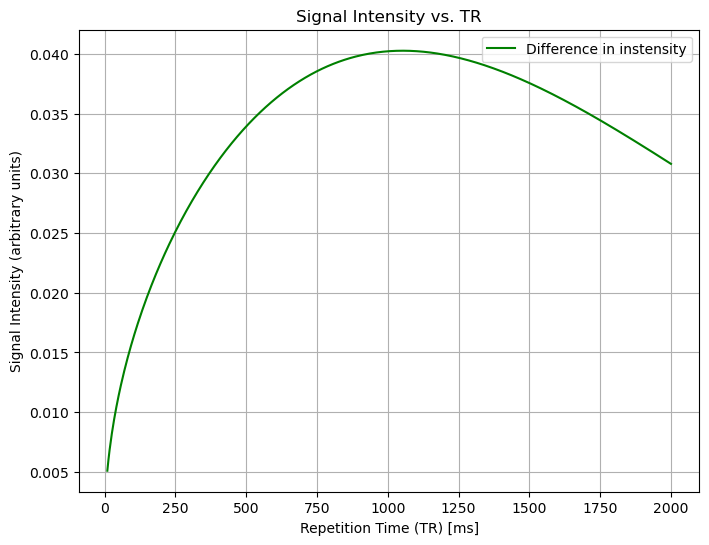

In [5]:
# What if we don't fix TR?
import numpy as np
import matplotlib.pyplot as plt

TRs = np.linspace(10, 2000, 500)
theta_1 = np.arccos(np.exp(-TRs / t1_gm))
theta_2 = np.arccos(np.exp(-TRs / t1_wm))

E1_gm = np.exp(-TRs / t1_gm)
E1_wm = np.exp(-TRs / t1_wm)
S1 = np.sin(theta_1) * (1 - E1_gm) / (1 - E1_gm * np.cos(theta_1))
S2 = np.sin(theta_2) * (1 - E1_wm) / (1 - E1_wm * np.cos(theta_2))

# Plot
plt.figure(figsize=(8, 6))
#plt.plot(TRs, S1, label=f'T1 = {t1_gm} ms', color='blue')
#plt.plot(TRs, S2, label=f'T1 = {t1_wm} ms', color='red')
plt.plot(TRs, np.abs(S2-S1), label=f'Difference in instensity', color='green')
plt.xlabel('Repetition Time (TR) [ms]')
plt.ylabel('Signal Intensity (arbitrary units)')
plt.title('Signal Intensity vs. TR')
plt.legend()
plt.grid(True)
plt.show()

### Acquistion parameters and measurement

In [8]:
# Following the QSM recommendations for initial testing, echospacing of 8ms and we should include the T2s of tissue of interest
# In this case our last echo would be T2* of sc_gm around 40ms
complete_TEs = [0.008, 0.016, 0.024, 0.032, 0.040]

In [9]:
complete_gauss_mag, complete_gauss_phase = complete_measurement(t1_gauss_data, pd_gauss_data, t2s_gauss_data, dimensions, dB0_gauss_ppm_data , fa_gm, complete_TEs, tr, fieldStrength) # By default, B0 is 3 Tesla

Starting optimize_measurement
Processing TE[0] = 0.008  [s]
Using T1, T2* and PD for simulation
sin($/alpha$):  0.1788776822909693
handedness=left
Coefficient of phase factor:  -6.420532498559999j
Finished optimized_signal
mag shape: (512, 512, 828), phase_arr shape: (512, 512, 828)
Processing TE[1] = 0.016  [s]
Using T1, T2* and PD for simulation
sin($/alpha$):  0.1788776822909693
handedness=left
Coefficient of phase factor:  -12.841064997119998j
Finished optimized_signal
mag shape: (512, 512, 828), phase_arr shape: (512, 512, 828)
Processing TE[2] = 0.024  [s]
Using T1, T2* and PD for simulation
sin($/alpha$):  0.1788776822909693
handedness=left
Coefficient of phase factor:  -19.261597495679997j
Finished optimized_signal
mag shape: (512, 512, 828), phase_arr shape: (512, 512, 828)
Processing TE[3] = 0.032  [s]
Using T1, T2* and PD for simulation
sin($/alpha$):  0.1788776822909693
handedness=left
Coefficient of phase factor:  -25.682129994239997j
Finished optimized_signal
mag shape: (

In [10]:
temp_gauss_mag = nib.Nifti1Image(complete_gauss_mag, affine = segmentations_img.affine)
temp_gauss_ph = nib.Nifti1Image(complete_gauss_phase, affine = segmentations_img.affine)

gauss_magnitude_outpath = "E:/msc_data/sc_qsm/data/wb/simulation/gauss_full_sim_mag_pro.nii.gz"
gauss_phase_outpath = "E:/msc_data/sc_qsm/data/wb/simulation/gauss_full_sim_phase_pro.nii.gz"

nib.save(temp_gauss_mag, gauss_magnitude_outpath)
nib.save(temp_gauss_ph, gauss_phase_outpath)

### Loading Mag & Phase for Echo extraction

In [ ]:
# After cropping, we can load and extract just 1 echo or all
path_to_cropped_pw_mag = "E:/msc_data/sc_qsm/data/wb/simulation/pw_full_sim_mag_pro_cropped.nii.gz"
cropped_pw_mag_img = nib.load(path_to_cropped_pw_mag)
cropped_pw_mag_data = cropped_pw_mag_img.get_fdata()

In [ ]:
path_to_cropped_pw_ph = "E:/msc_data/sc_qsm/data/wb/simulation/pw_full_sim_mag_pro_cropped.nii.gz"
cropped_pw_ph_img = nib.load(path_to_cropped_pw_ph)
cropped_pw_ph_data = cropped_pw_mag_img.get_fdata()

# Testing python stuff that makes things wrong

In [9]:
gamma_rd_sT = 267.52218744 * 10e5 # In rad/(sec * T)
gamma_rd_sT

267522187.43999997

In [18]:
a = 0.008
c= a*1e3
print(c)
b = a*10e3
b

8.0


80.0

In [23]:
t2s_vol[80,80,80]
h = t2s_vol[80,80,80]*1e-3
print(h)

0.035


In [25]:
267.52218744 * 1e6 * 3 * 1e-6 /(2*pi*3)

42.57747851783255

In [12]:
for te in range(len(TE_list)):
    mag_name = "sim_mag_pro"+ "_echo_" + str(te) +".nii.gz"
    phs_name = "sim_phase_pro"+ "_echo_" + str(te) +".nii.gz"
    print(mag_name)
    print(phs_name)

sim_mag_pro_echo_0.nii.gz
sim_phase_pro_echo_0.nii.gz
sim_mag_pro_echo_1.nii.gz
sim_phase_pro_echo_1.nii.gz


## Example of pixel correction

In [2]:
import numpy as np
import nibabel as nib
%cd tissue-to-MRproperty
%cd functions
from volume import volume
%cd ../..

c:\Users\User\msc_project\Image-processing-strategies\MRsim\tissue-to-MRproperty
c:\Users\User\msc_project\Image-processing-strategies\MRsim\tissue-to-MRproperty\functions
c:\Users\User\msc_project\Image-processing-strategies\MRsim


c:\Users\User\miniconda3\envs\mrsim\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
c:\Users\User\miniconda3\envs\mrsim\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
# Lets create a volume object with the labeled nifti file
labeled_img = nib.load("data/ratatouille_crop.nii.gz")
rata_class = volume(labeled_img)
rata_class.group_seg_labels("TotalSeg_CT", "mod2")

In [6]:
rata_class.check_pixels()

Pixel with wrong value: 809.0 located at (47, 29, 77)
(indexed from [0,0,0])
[Y] continues checking pixels, [n] lets you edit it
Maybe you want to change the value?
Changed value to:  196
Pixel with wrong value: 809.0 located at (47, 30, 74)
(indexed from [0,0,0])
[Y] continues checking pixels, [n] lets you edit it
Maybe you want to change the value?
Changed value to:  196
Pixel with wrong value: 809.0 located at (48, 28, 81)
(indexed from [0,0,0])
[Y] continues checking pixels, [n] lets you edit it
Maybe you want to change the value?
Changed value to:  196
Pixel with wrong value: 749.0 located at (60, 100, 178)
(indexed from [0,0,0])
[Y] continues checking pixels, [n] lets you edit it
Maybe you want to change the value?
Changed value to:  289
Pixel with wrong value: 749.0 located at (61, 100, 178)
(indexed from [0,0,0])
[Y] continues checking pixels, [n] lets you edit it
Maybe you want to change the value?
Changed value to:  289
Saving corrected volume for later usage!


0

# After correcting the pixels </br>
Now we can load the image witht the corrected pixels and test the gaussian distribution

In [1]:
import numpy as np
import nibabel as nib
%cd tissue-to-MRproperty
%cd functions
from volume import volume
%cd ../..

c:\Users\User\msc_project\Image-processing-strategies\MRsim\tissue-to-MRproperty
c:\Users\User\msc_project\Image-processing-strategies\MRsim\tissue-to-MRproperty\functions
c:\Users\User\msc_project\Image-processing-strategies\MRsim


c:\Users\User\miniconda3\envs\mrsim\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
%cd tissue-to-MRproperty
!git checkout dev/better_values

c:\Users\User\msc_project\Image-processing-strategies\MRsim\tissue-to-MRproperty
M	interactive.ipynb
Your branch is up to date with 'origin/dev/better_values'.


Already on 'dev/better_values'


In [3]:
corrected_ratatouille = nib.load("E:/msc_data/sc_qsm/data/wb/data/ratatouille_corrected_pixels.nii.gz")
corrected_vol = volume(corrected_ratatouille)


In [4]:
corrected_vol.group_seg_labels(tool= "TotalSeg_CT",version = "mod2",type="pd")

###
air  PD: 0.01
###
spleen  PD: 80
###
kidney  PD: 70
###
kidney  PD: 70
###
organ  PD: 50
###
liver  PD: 70
###
organ  PD: 50
###
organ  PD: 50
###
gland  PD: 100
###
gland  PD: 100
###
lung  PD: 0
###
lung  PD: 0
###
lung  PD: 0
###
lung  PD: 0
###
lung  PD: 0
###
esophagus  PD: 35
###
trachea  PD: 15
###
gland  PD: 100
###
organ  PD: 50
###
organ  PD: 50
###
organ  PD: 50
###
organ  PD: 50
###
organ  PD: 50
###
kidney  PD: 70
###
kidney  PD: 70
###
bone  PD: 117
###
bone  PD: 117
###
bone  PD: 117
###
bone  PD: 117
###
bone  PD: 117
###
bone  PD: 117
###
bone  PD: 117
###
bone  PD: 117
###
bone  PD: 117
###
bone  PD: 117
###
bone  PD: 117
###
bone  PD: 117
###
bone  PD: 117
###
bone  PD: 117
###
bone  PD: 117
###
bone  PD: 117
###
bone  PD: 117
###
bone  PD: 117
###
bone  PD: 117
###
bone  PD: 117
###
bone  PD: 117
###
bone  PD: 117
###
bone  PD: 117
###
bone  PD: 117
###
bone  PD: 117
###
bone  PD: 117
###
heart  PD: 85
###
extra  PD: 120
###
extra  PD: 120
###
extra  PD: 120
###

AttributeError: 'SegmentationLabel' object has no attribute 'std_dev'

In [4]:
corrected_vol.calc_regions()

KeyError: 0.0

In [4]:
print(corrected_class.relax_values)

{'air': [0, 0, 0, 0.01, 0.01], 'bone': [None, 1204, 53, 33.03, 117], 'lungs': [None, 1270, None, 1, 0.1], 'water': [None, 2500, 2500, 1000, 100], 'CSF': [None, 3200, 2000, 1000, 100], 'spinal_cord': [None, None, None, 76, 59.5], 'sc_csf': [None, 3200, 2000, 1000, 100], 'sc_wm': [None, None, None, 53, 70], 'sc_gm': [None, None, None, 66, 82], 'fat': [None, 380, 108, 35, 140], 'liver': [None, 809, 34, 17.0, 70], 'spleen': [None, 1328, 61, 32.5, 80], 'brain': [None, None, None, 60.8, 90], 'white_matter': [None, None, None, 53, 70], 'gray_matter': [None, None, None, 66, 82], 'heart': [1000, 1300, 55, 9.25, 85], 'kidney': [None, 1190, 56, 32.7, 70], 'pancreas': [None, 725, 43, 37, 75], 'cartilage': [None, 1240, 32, 20, 50], 'bone_marrow': [None, 365, 23, None, 60], 'SpinalCanal': [None, 993, 78, 60, 100], 'esophagus': [None, None, None, 17, 35], 'trachea': [None, None, None, 25, 15], 'organ': [None, 800, 34, 17, 50], 'gland': [None, None, None, 50, 100], 'extra': [None, 750, 50, 35, 120]}


In [5]:
corrected_class.label_counts

{'air': 145206,
 'spleen': 8240,
 'kidney': 28401,
 'organ': 87638,
 'liver': 66284,
 'gland': 8380,
 'lung': 319438,
 'esophagus': 14181,
 'trachea': 21044,
 'bone': 373405,
 'heart': 120805,
 'extra': 513009,
 'sc_wm': 6434,
 'fat': 1317686,
 'sc_csf': 32268,
 'sc_gm': 2879}

In [6]:
corrected_class.unique_counts

{0.0: 145206,
 1.0: 8240,
 2.0: 12736,
 3.0: 15665,
 4.0: 16,
 5.0: 66284,
 6.0: 14286,
 7.0: 21442,
 8.0: 1424,
 9.0: 1971,
 10.0: 54053,
 11.0: 54341,
 12.0: 107916,
 13.0: 14457,
 14.0: 88671,
 15.0: 14181,
 16.0: 21044,
 17.0: 4985,
 18.0: 24230,
 19.0: 26803,
 20.0: 861,
 28.0: 13772,
 29.0: 33508,
 30.0: 31504,
 31.0: 26701,
 32.0: 22992,
 33.0: 20611,
 34.0: 19225,
 35.0: 17546,
 36.0: 15819,
 37.0: 14610,
 38.0: 13641,
 39.0: 13032,
 40.0: 11823,
 41.0: 11630,
 42.0: 12118,
 43.0: 12326,
 44.0: 9764,
 45.0: 8237,
 46.0: 7564,
 47.0: 7576,
 48.0: 6467,
 49.0: 9932,
 50.0: 6625,
 51.0: 120805,
 52.0: 120418,
 53.0: 8835,
 54.0: 2654,
 55.0: 1960,
 56.0: 2694,
 57.0: 897,
 58.0: 2375,
 59.0: 5311,
 60.0: 3669,
 61.0: 4471,
 62.0: 12091,
 63.0: 26291,
 64.0: 2873,
 73.0: 789,
 74.0: 539,
 86.0: 143397,
 87.0: 141797,
 88.0: 13724,
 89.0: 19552,
 91.0: 5149,
 92.0: 415,
 93.0: 484,
 94.0: 520,
 95.0: 367,
 96.0: 502,
 97.0: 545,
 98.0: 758,
 99.0: 877,
 100.0: 933,
 101.0: 1283,
 10

In [7]:
corrected_class.create_gauss_dist("sus")

label_name:  air susceptibility: 0.35
label_name:  spleen susceptibility: -9.05
label_name:  kidney susceptibility: -9.05
label_name:  kidney susceptibility: -9.05
label_name:  organ susceptibility: -9.05
label_name:  liver susceptibility: -9.05
label_name:  organ susceptibility: -9.05
label_name:  organ susceptibility: -9.05
label_name:  gland susceptibility: -9.05
label_name:  gland susceptibility: -9.05
label_name:  lung susceptibility: 0.2
label_name:  lung susceptibility: 0.2
label_name:  lung susceptibility: 0.2
label_name:  lung susceptibility: 0.2
label_name:  lung susceptibility: 0.2
label_name:  esophagus susceptibility: -9.05
label_name:  trachea susceptibility: 0.2
label_name:  gland susceptibility: -9.05
label_name:  organ susceptibility: -9.05
label_name:  organ susceptibility: -9.05
label_name:  organ susceptibility: -9.05
label_name:  bone susceptibility: -9
label_name:  bone susceptibility: -9
label_name:  bone susceptibility: -9
label_name:  bone susceptibility: -9
la

In [8]:
import os
gauss_dis = corrected_class.gaussian_phantom
temp_img = nib.Nifti1Image(gauss_dis, affine=corrected_class.nifti.affine)

patho = os.path.join('output','gauss_trial_vol.nii.gz')
nib.save(temp_img, patho)

# Adding Gaussian Noise to magnitude

In [ ]:
# After correcting the pixels and creating a gauss susceptibility distribution
# Running the simulation

## Testing 

In [6]:
look_up = corrected_class.look_up
print(look_up.get(0)[1])
# Instead of indexing by name I have to index by label ID number

0.35


In [9]:
unique_labels, counts = np.unique(corrected_class.volume, return_counts=True)
label_counts = dict(zip(unique_labels,counts))

print(label_counts)


{0.0: 145206, 1.0: 8240, 2.0: 12736, 3.0: 15665, 4.0: 16, 5.0: 66284, 6.0: 14286, 7.0: 21442, 8.0: 1424, 9.0: 1971, 10.0: 54053, 11.0: 54341, 12.0: 107916, 13.0: 14457, 14.0: 88671, 15.0: 14181, 16.0: 21044, 17.0: 4985, 18.0: 24230, 19.0: 26803, 20.0: 861, 28.0: 13772, 29.0: 33508, 30.0: 31504, 31.0: 26701, 32.0: 22992, 33.0: 20611, 34.0: 19225, 35.0: 17546, 36.0: 15819, 37.0: 14610, 38.0: 13641, 39.0: 13032, 40.0: 11823, 41.0: 11630, 42.0: 12118, 43.0: 12326, 44.0: 9764, 45.0: 8237, 46.0: 7564, 47.0: 7576, 48.0: 6467, 49.0: 9932, 50.0: 6625, 51.0: 120805, 52.0: 120418, 53.0: 8835, 54.0: 2654, 55.0: 1960, 56.0: 2694, 57.0: 897, 58.0: 2375, 59.0: 5311, 60.0: 3669, 61.0: 4471, 62.0: 12091, 63.0: 26291, 64.0: 2873, 73.0: 789, 74.0: 539, 86.0: 143397, 87.0: 141797, 88.0: 13724, 89.0: 19552, 91.0: 5149, 92.0: 415, 93.0: 484, 94.0: 520, 95.0: 367, 96.0: 502, 97.0: 545, 98.0: 758, 99.0: 877, 100.0: 933, 101.0: 1283, 102.0: 1333, 103.0: 1171, 104.0: 2083, 105.0: 1023, 106.0: 919, 107.0: 710, 1

In [8]:
# Looking how to address at the look up table to get the susceptibility
look_up_vals = corrected_class.look_up
only_label_counts = {}

for l, count in label_counts.items():
    # Getting the susceptibility of each label
    label_id = l
    nn = look_up_vals[l][0]
    susceptibility = look_up_vals[l][1]
    print(susceptibility)
    if nn in only_label_counts.keys():
        only_label_counts[nn] += count
    else:
        only_label_counts[nn] = count
    

print(only_label_counts)


0.35
-9.05
-9.05
-9.05
-9.05
-9.05
-9.05
-9.05
-9.05
-9.05
0.2
0.2
0.2
0.2
0.2
-9.05
0.2
-9.05
-9.05
-9.05
-9.05
-9
-9
-9
-9
-9
-9
-9
-9
-9
-9
-9
-9
-9
-9
-9
-9
-9
-9
-9
-9
-9
-9
-9
-9.04
-9.04
-9.04
-9.04
-9.04
-9.04
-9.04
-9.04
-9.04
-9.04
-9.04
-9.04
-9.04
-9.04
-9
-9
-9.04
-9.04
-9.04
-9.04
-9
-9
-9
-9
-9
-9
-9
-9
-9
-9
-9
-9
-9
-9
-9
-9
-9
-9
-9
-9
-9
-9
-9
-9
-9
-9
-9.083
-8.92
-9.05
-9.03
{'air': 145206, 'spleen': 8240, 'kidney': 28401, 'organ': 87638, 'liver': 66284, 'gland': 8380, 'lung': 319438, 'esophagus': 14181, 'trachea': 21044, 'bone': 373405, 'heart': 120805, 'extra': 513009, 'sc_wm': 6435, 'fat': 1317686, 'sc_csf': 32267, 'sc_gm': 2879}


### Grouping them up based on their susceptibility to create a label_gaussians 

In [15]:
print(corrected_class.label_gaussians['sc_wm'])

[-0.14366963  0.03799706  0.11785162 ...  0.08342116 -0.00545345
  0.013995  ]


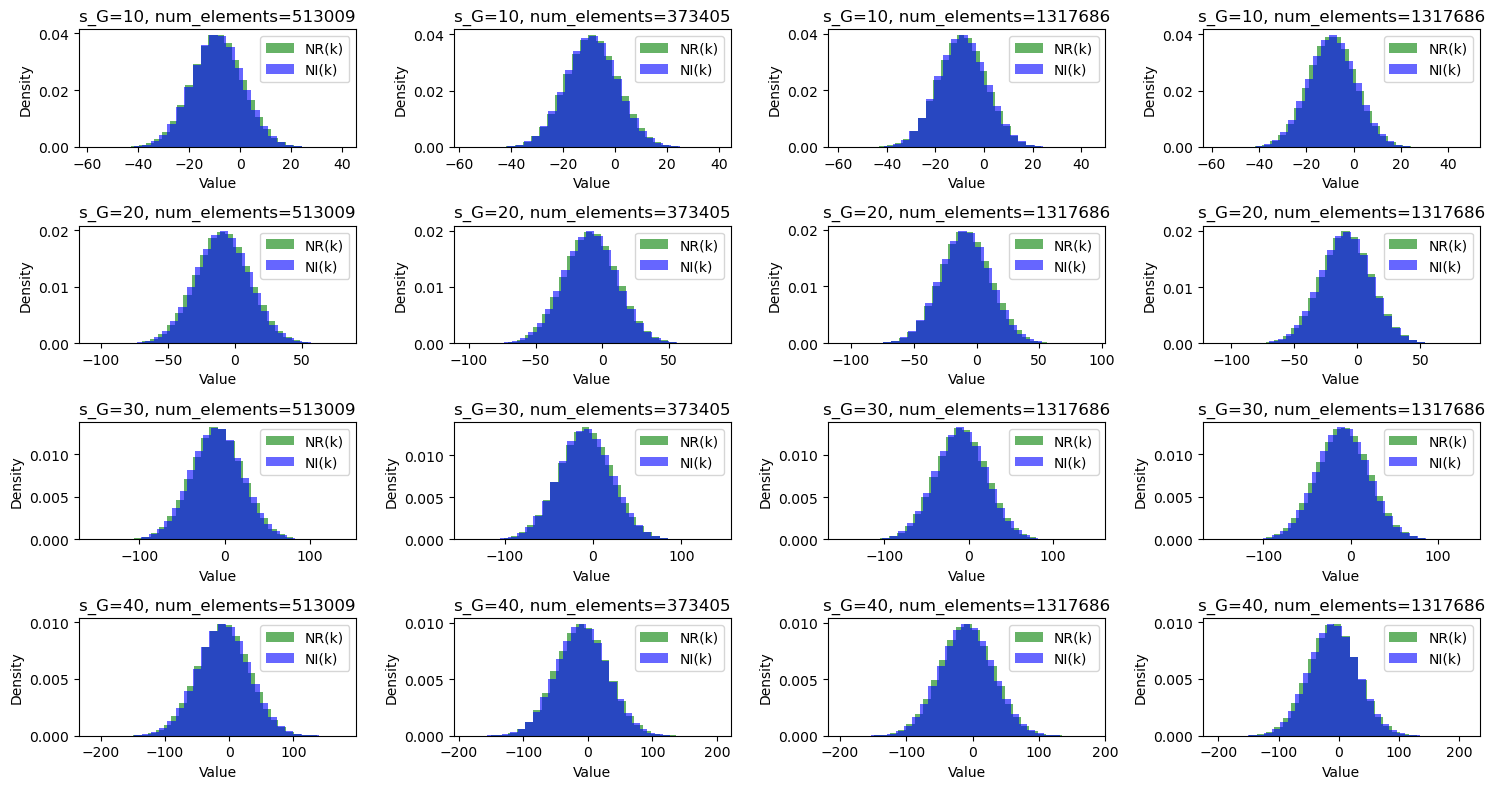

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate and plot Gaussian distributions
def plot_gaussian_distributions(std_devs, num_elements_list):
    num_plots = len(std_devs) * len(num_elements_list)
    fig, axes = plt.subplots(len(std_devs), len(num_elements_list), figsize=(15, 8))
    
    for i, s_G in enumerate(std_devs):
        for j, num_elements in enumerate(num_elements_list):
            # Generate random elements for NR(k) and NI(k) with zero mean and standard deviation s_G
            NR = np.random.normal(-9, s_G, num_elements)
            NI = np.random.normal(-9, s_G, num_elements)
            
            # Plot the histograms
            ax = axes[i, j] if len(std_devs) > 1 else axes[j]
            ax.hist(NR, bins=30, density=True, alpha=0.6, color='g', label='NR(k)')
            ax.hist(NI, bins=30, density=True, alpha=0.6, color='b', label='NI(k)')
            ax.set_title(f's_G={s_G}, num_elements={num_elements}')
            ax.set_xlabel('Value')
            ax.set_ylabel('Density')
            ax.legend()

    plt.tight_layout()
    plt.show()

# List of standard deviations and number of elements to compare
std_devs = [10, 20, 30, 40]
num_elements_list = [513009 , 373405 , 1317686, 1317686]

# Generate and plot the distributions
plot_gaussian_distributions(std_devs, num_elements_list)


In [14]:
std_dev = {

            "air": 2.78,  # air is backgrund
            # To all labels we have substracted air std_dev
            "bone": 10.87,
            "lung": 8.01,
            # Water is a value similar to CSF
            "water": 27.79,
            "CSF": 26.5,

            "spinal_cord": 7.64,

            "sc_csf": 26.5,
            # This values are not taken from Whole spine data
            # But taken from Brain image.
            # EAO Flash 2.5mm
            "sc_wm": 9.82,
            "sc_gm": 12.76,
            "brain": 27.91,
            ### Back to Whole Spine data values
            "fat": 33.78,
            "liver": 14.82,
            "spleen": 16.17,

            # "white_matter": ,  # This is the brain WM
            # "gray_matter": ,  # This is the brain GM

            "heart": 15.49,
            "kidney": 14.35,
            "pancreas": 16.94,
            "cartilage": 10.21,
            "bone_marrow": 12.2,
            "SpinalCanal": 18.895,  # sc_csf + (sc_wm + sc_gm / 2 )
            "esophagus": 17.33,
            "trachea": 10.21,  # Trachea should have similar to lung
            "organ": 14.66,
            "gland": 15.82,

            "extra": 14.91,

            "sinus": 9.53}

std_dev['air']

2.78